# 🛰️ Sentinel-1 SAR Image Processing with openEO (Export to GeoTIFF)
This notebook uses the openEO API to process a Sentinel-1 SAR image (VV polarization), applies log compression for visualization, and exports it as a GeoTIFF file.

Reference: https://documentation.dataspace.copernicus.eu/APIs/openEO/openeo-community-examples/python/OilSpill/OilSpillMapping.html


In [ ]:
# Install required packages (for Google Colab)
!pip install openeo rasterio matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.9 MB/s eta 0:00:00


In [ ]:
# Import libraries
import openeo
import openeo.processes
import numpy as np
import rasterio
import matplotlib.pyplot as plt

c:\Users\Bruna\Documents\repos\oil_spill_segmentation\oil_segmentation_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Connect and authenticate to Copernicus Data Space openEO backend
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [3]:
# Define the area of interest (AOI)
aoi = {
    "type": "Polygon",
    "coordinates": [
        [
            [48.325487506118264, 28.742803969343313],
            [48.325487506118264, 28.414218984218607],
            [48.75387693420447, 28.414218984218607],
            [48.75387693420447, 28.742803969343313],
            [48.325487506118264, 28.742803969343313],
        ]
    ]
}

In [4]:
# Load Sentinel-1 VV backscatter data
s1_image_original = connection.load_collection(
    "SENTINEL1_GRD",
    temporal_extent=["2017-08-09", "2017-08-12"],
    spatial_extent=aoi,
    bands=["VV"]
)
# Apply backscatter calibration
s1_image = s1_image_original.sar_backscatter(coefficient="sigma0-ellipsoid")

In [5]:
# Apply log10 compression (in decibels)
s1_image = s1_image.apply(lambda x: 10 * openeo.processes.log(x, base=10))

In [17]:
# Export the processed image as GeoTIFF
job = s1_image.execute_batch(
    title="Sentinel1_Processed_TIFF",
    outputfile="../data/satellite_results/Sentinel1_Processed_Image.tif",
    out_format="GTIFF"
)

0:00:00 Job 'j-2507081516204d998099da4cf8286473': send 'start'
0:00:14 Job 'j-2507081516204d998099da4cf8286473': created (progress 0%)
0:00:19 Job 'j-2507081516204d998099da4cf8286473': created (progress 0%)
0:00:25 Job 'j-2507081516204d998099da4cf8286473': created (progress 0%)
0:00:33 Job 'j-2507081516204d998099da4cf8286473': created (progress 0%)
0:00:43 Job 'j-2507081516204d998099da4cf8286473': created (progress 0%)
0:00:56 Job 'j-2507081516204d998099da4cf8286473': running (progress N/A)
0:01:11 Job 'j-2507081516204d998099da4cf8286473': running (progress N/A)
0:01:31 Job 'j-2507081516204d998099da4cf8286473': running (progress N/A)
0:01:55 Job 'j-2507081516204d998099da4cf8286473': running (progress N/A)
0:02:25 Job 'j-2507081516204d998099da4cf8286473': running (progress N/A)
0:03:02 Job 'j-2507081516204d998099da4cf8286473': finished (progress 100%)


In [16]:
results = job.get_results()
results.download_files("../data/satellite_results") 

[WindowsPath('../data/satellite_results/openEO_2017-08-10Z.tif'),
 WindowsPath('../data/satellite_results/job-results.json')]

In [ ]:
#colab

# job_results = job.get_results()
# job_results.download_files(target=".")
# Lista seus jobs
# for job in connection.list_jobs():
  #  job_id = job.get('id', 'N/A')  # Use .get() with a default value in case 'id' is missing
  #  job_title = job.get('title', 'N/A') # Use .get() to safely access 'title' with a default value
  #  job_status = job.get('status', 'N/A') # Also get status
  #  print(f"ID: {job_id}, Title: {job_title}, Status: {job_status}")


# # Substitua pelo ID correspondente
# job = connection.job("j-2507080948124dccbd2ee34007792b7b")  # copie o ID que apareceu acima
# job_results = job.get_results()

# # Baixar o GeoTIFF
# job_results.download_files(target=".")

# from google.colab import files
# files.download("openEO_2017-08-10Z.tif")

# Substitua pelo ID correspondente
# job = connection.job("j-2507080935154602ad47adf48b710309")  # copie o ID que apareceu acima
# job_results = job.get_results()

# # Baixar o GeoTIFF
# job_results.download_files(target=".")

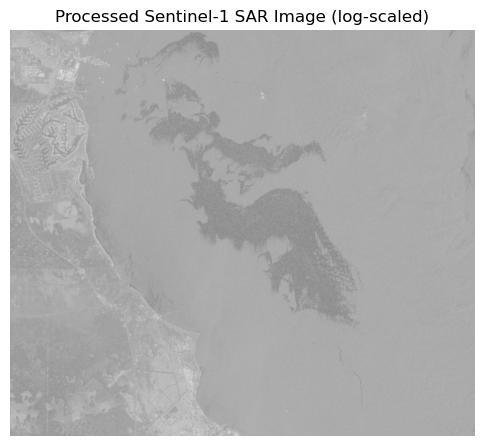

In [ ]:
# Visualize the image after download
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("../data/satellite_results/Sentinel1_Processed_Image.tif") as src:
    image = src.read(1)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Processed Sentinel-1 SAR Image (log-scaled)")
plt.axis('off')
plt.show()